### Homework 1b: 

### This solution is for showing that explosions occur when the process diverges to infinity in finite time when ∞∑n=1(1/λn)<∞.

For a pure birth process, divergence to infinity turns out to occur if and only if the expected time to go from any state to infinity is finite.
This I have shown intuitively in the solution pdf.

A pure birth process is explosive (diverges to infinity in finite time) if and only if the mean time to diverge is finite, i.e.,∞∑n=1(1/λn)<∞.

I show this here using two examples:

A pure birth process should be explosive if I set λn=cn2, n≥1,

but will ne inexplosive if λn=cn, n≥1.

This means that the first process cannot be normalized for all finite times.


In [1]:
# Generate a random sample Y from the uniform distribution

import numpy as np
import matplotlib.pyplot as plt
import time

seed = 98765

np.random.seed(seed)

def yuleExplodes(N, trajectories, v, N0):
    s = np.zeros((trajectories, N))
    X = np.zeros((trajectories, N))
    X[:,0] = N0
    n = 0
    
    for j in range(trajectories):
        for i in range(N-1):
            n+1
            b = v*1*np.power(n,2)
            h = -np.log(np.random.rand())/(b*X[j,i])
            s[j, i+1] = s[j, i] + h
            X[j, i+1] = X[j, i] + 1
            
    return [s, b, X]

def yule(N, trajectories, v, N0):
    s = np.zeros((trajectories, N))
    X = np.zeros((trajectories, N))
    X[:,0] = N0
    n = 0
    
    for j in range(trajectories):
        for i in range(N-1):
            n = n+1
            b = v*2*np.power(n,1)
            h = -np.log(np.random.rand())/(b*X[j,i])
            s[j, i+1] = s[j, i] + h
            X[j, i+1] = X[j, i] + 1
            
    return [s, b, X]


def deterministic(s, N, b, N0):
    tmax = max(s[:, -1])
    t = np.linspace(0, tmax, 10*N)
    yd = N0*np.exp(b*t)
    
    return[t, yd]

def plotPaths(N, trajectories, v, X0):
    fig, ax = plt.subplots()
    
    [sojourn, rate, population] = yule(N, trajectories, v, X0)
    [time, detsol] = deterministic(sojourn, N, v, X0)
    
    ## Sets axis ranges for plotting
    xmax = max([max(sojourn[k,:]) for k in range(trajectories)])
    ymin = min([min(population[k, :]) for k in range(trajectories)])
    ymax = max([max(population[k, :]) for k in range(trajectories)])
    
    ## Generates plots
    for r in range(trajectories):
        plt.step(sojourn[r,:], population[r,:], where='post', label="Trajectory %s " % str(r+1))
        
    plt.plot(time, detsol, 'k--', label="Determinstic")
    plt.axis([-0.2, xmax+0.2, ymin-2, ymax+2])
    ax.set_xlabel('Time', fontsize=14)
    ax.set_ylabel('Population Size', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.legend(loc=2)
    plt.show() 
    
def plotPathsExplosive(N, trajectories, v, X0):
    fig, ax = plt.subplots()

    [sojourn, rate, population] = yuleExplodes(N, trajectories, v, X0)
    [time, detsol] = deterministic(sojourn, N, v, X0)

    ## Sets axis ranges for plotting
    xmax = max([max(sojourn[k,:]) for k in range(trajectories)])
    ymin = min([min(population[k, :]) for k in range(trajectories)])
    ymax = max([max(population[k, :]) for k in range(trajectories)])

    ## Generates plots
    for r in range(trajectories):
        plt.step(sojourn[r,:], population[r,:], where='post', label="Trajectory %s " % str(r+1))

    plt.plot(time, detsol, 'k--', label="Determinstic")
    plt.axis([-0.2, xmax+0.2, ymin-2, ymax+2])
    ax.set_xlabel('Time', fontsize=14)
    ax.set_ylabel('Population Size', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.legend(loc=2)
    plt.show() 

Explosions occur when the process diverges to infinity in finite time. 

For a pure birth process, divergence to infinity turns out to occur if and only if the expected time to go from any state to infinity is finite.

This I have shown intuitively in the solution shown above.

A pure birth process is explosive (diverges to infinity in finite time) if and only if the mean time to diverge is finite, i.e.,∞∑n=1(1/λn)<∞.

I show this here using two examples:

A pure birth process should be explosive if I set λn=cn2, n≥1,

but will ne inexplosive if λn=cn, n≥1.

This means that the first process cannot be normalized for all finite times.

/home/dcajuzie/.virtualenvs/dl4cv/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/home/dcajuzie/.virtualenvs/dl4cv/lib/python3.6/site-packages/numpy/core/function_base.py:153: RuntimeWarning: invalid value encountered in multiply
  y *= step


ValueError: Axis limits cannot be NaN or Inf

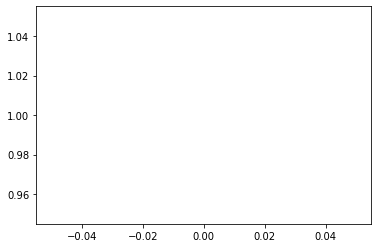

In [2]:
# Here I set the rate λn=cn^2, c = 2, n≥1 so that the processes diverges
# to infinity in finite time

maxPop = 10
    
trajectories = 5
birthrate = 0.4
initPop = 1
    
plotPathsExplosive(maxPop, trajectories, birthrate, initPop)

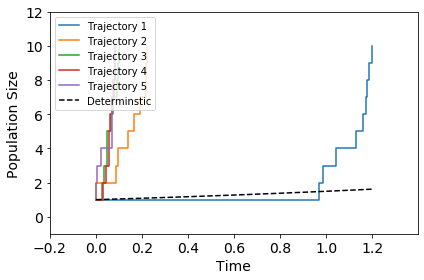

In [4]:
# Here I set the rate λn=cn, c = 2, n≥1 

maxPop = 10
    
trajectories = 5
birthrate = 0.4
initPop = 1
    
plotPaths(maxPop, trajectories, birthrate, initPop) 

I'm not sure exactly how I can achieve a formulation to show the simulation until explosion. It appears to do so within very small time frame.